classification is a problem of predicting wether something is one thing or another (there can be multiple things as the options)

In [1]:
#make classification data and get it ready

In [2]:
import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

/Users/kush/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
#making df with pandas
import pandas as pd
circles= pd.DataFrame({"X1": X[:, 0],
                     "X2": X[:,1],
                     "lable": y})
circles

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
#visualisations

In [7]:
import matplotlib.pyplot as plt

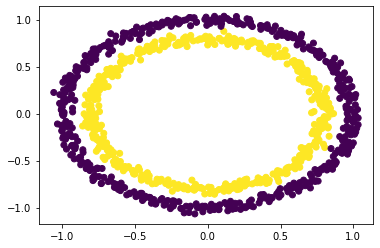

In [8]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.show()

#toy data - small enough to experiment on but large enough to practice

In [9]:
#input and output shapes

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
import torch
from torch import nn

In [12]:
X_sample =X[0]
y_sample= y[0]
X_sample.shape,y_sample.shape


((2,), ())

In [13]:
X_sample,y_sample

(array([0.75424625, 0.23148074]), 1)

* so we can say 2 features of X find one feature of Y

In [14]:
#turn data to tensors

In [15]:
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

In [16]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
#split data to training and test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [21]:
#builing a model

Classify blue and red dots

1) construct a model
2) define loss funtion and optimizer
3) create training ans test loop

In [22]:
#subclass nn.module
#create 2 nn.linear() layers that are capable to handle our data
#define a forward method
#instantiate an instance of our model class

In [23]:
#subclass nn.module
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        
        #create 2 nn.Linear layers
#         self.layer_1=nn.Linear(in_features=2, out_features=5)
#         self.layer_2=nn.Linear(in_features=5, out_features=1) #infeature of layer 2= outfeature of layer 1
        
        self.two_linear_layers= nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    
# replicate the model using nn.sequential
    def forward(self,x):
        return two_linear_layers(x)
#         return self.layer_2(self.layer_1(x)) #x -> layer_1  -> layer_2 -> output


#instantiate our model
model_0 = CircleModelV1()
model_0

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [24]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6805,  0.0334],
                      [-0.0764,  0.6901],
                      [ 0.0061, -0.5326],
                      [ 0.2965,  0.6367],
                      [ 0.3487,  0.1064]])),
             ('0.bias', tensor([-0.4149,  0.2508, -0.5356, -0.5263,  0.1812])),
             ('1.weight',
              tensor([[-0.2466,  0.1835, -0.0108, -0.2107, -0.2806]])),
             ('1.bias', tensor([0.2885]))])

In [26]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test)
len(untrained_preds),untrained_preds.shape,len(X_test), X_test.shape

(200, torch.Size([200, 1]), 200, torch.Size([200, 2]))

In [27]:
untrained_preds[:10]

tensor([[0.4779],
        [0.4643],
        [0.5199],
        [0.4660],
        [0.5297],
        [0.5213],
        [0.4751],
        [0.4885],
        [0.5194],
        [0.4635]])

In [28]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [29]:
#Setup loss function and optimizer

In [30]:
#for regession- MAE or MSE
#for classification- binary cross entropy or categorical cross entropy
#for optimizer- SDG o adam

In [31]:
# loss_fn= nn.BCELoss()
loss_fn= nn.BCEWithLogitsLoss() #sigmoid activation function

#optimizer
optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [32]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6805,  0.0334],
                      [-0.0764,  0.6901],
                      [ 0.0061, -0.5326],
                      [ 0.2965,  0.6367],
                      [ 0.3487,  0.1064]])),
             ('0.bias', tensor([-0.4149,  0.2508, -0.5356, -0.5263,  0.1812])),
             ('1.weight',
              tensor([[-0.2466,  0.1835, -0.0108, -0.2107, -0.2806]])),
             ('1.bias', tensor([0.2885]))])

In [33]:
#calc accuracy
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred)) * 100
    return acc

#training model

In [82]:
#view first 5 outputs of forward pass on test data
model_0.eval()
with torch.inference_mode():
    y_logits=model_0(X_test)[:5]
y_logits


tensor([[ 0.0280],
        [ 0.0518],
        [-0.0321],
        [ 0.0451],
        [-0.0287]])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [36]:
#use sigmoid activation funtion on our model logits to tun them into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6173],
        [0.6140],
        [0.6271],
        [0.6144],
        [0.6294]])

In [37]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

for our prediction probablity values , we need to perform a range stype rounding on then
1) y_pred_probs>=0.5 (class 1)

2) y_pred_probs<0.5 (class 0)


In [38]:
#find the predicted lables
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test)))[:5]

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [39]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [81]:
#building training and testing loop
# training loop
torch.manual_seed(42)
epochs=1000

#loop thru the data
for epoch in range(epochs):
    #model train
    model_0.train()
    #forward pass
    y_logits= model_0(X_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits))
    
    #calculate the loss
    loss=loss_fn(y_logits, y_train)
    #calculate the accuracy
    acc= accuracy_fn(y_true=y_train, y_pred=y_pred)
    #optimizer
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    # step the optimizer
    optimizer.step()
    
    #testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits= model_0(X_test).squeeze()
        test_pred= torch.round(torch.sigmoid(test_logits))
        
        #calculate test loss/acc
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc= accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    #print out whats happening
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
#         print(model_0.state_dict())

Epoch: 0 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 100 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 200 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 300 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 400 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 500 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 600 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | loss:  0.69298, Acc:51.00% | Test loss: 0.69468, Test acc: 46.00%


In [75]:
y_logits

tensor([ 2.1653e-01, -4.1627e-01, -1.7759e-01, -7.7941e-02,  2.0538e-01,
         1.3533e-01,  1.3923e-01,  1.6943e-01, -2.8157e-01, -7.3963e-01,
        -7.8754e-02, -1.1083e-01, -8.2401e-01, -4.0548e-01,  3.7736e-01,
         2.8471e-01, -2.1266e-01,  1.5444e-01, -6.2001e-01,  3.6569e-02,
         2.4342e-01,  2.0682e-01, -4.8369e-01,  3.4805e-01, -1.0222e-01,
        -7.0218e-02, -3.0788e-01, -4.0376e-01, -1.2921e-01, -2.5806e-01,
        -5.1463e-01, -7.7802e-01, -4.4622e-01,  1.1989e-01, -3.5143e-01,
        -2.3208e-01,  5.3820e-01,  1.1820e-01,  1.6348e-01,  3.6904e-01,
         1.2786e-01,  4.1269e-01,  5.3179e-02,  3.8639e-01, -2.5363e-01,
         6.8213e-02,  3.6669e-02, -4.7570e-01,  2.0852e-01, -2.7158e-01,
         5.5978e-02,  2.3057e-01, -2.3500e-01, -1.0730e-01,  1.0590e-01,
         2.6649e-01, -3.6712e-01,  1.8721e-01,  2.9568e-01, -4.1068e-05,
        -5.9402e-01, -3.8764e-01, -3.4403e-01,  4.7285e-01, -7.0072e-01,
        -5.9177e-01,  2.9781e-01, -2.0529e-01, -6.1

In [41]:
#make predictions and evaluate the model
#make predictions visual

In [42]:
import requests
from pathlib import Path

#download helper function
if Path("helper_functions.py").is_file():
    print('already downloaded')
else:
    print('downloading....')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


already downloaded


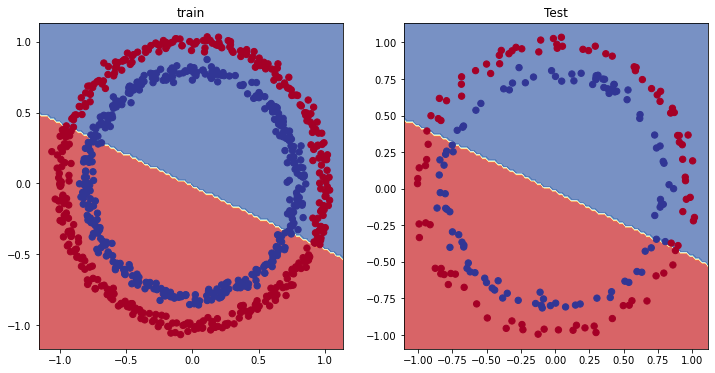

In [43]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

#### improving a model
* add more layers
* add more hidden units- from 5 to 10 units
* fit for longer (more epochs)
* change in activation functions
* change the lr rate
* change loss function

In [44]:
#subclass nn.module
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
#         create 2 nn.Linear layers
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10) #infeature of layer 2= outfeature of layer 1
        self.layer_3=nn.Linear(in_features=10, out_features=1)
    
#         self.two_linear_layers= nn.Sequential(
#             nn.Linear(in_features=2, out_features=10),
#             nn.Linear(in_features=10, out_features=10),
#             nn.Linear(in_features=10, out_features=1)
#         )

    
# replicate the model using nn.sequential
    def forward(self,x):
#         z= self.layer_1(x)
#         z= self.layer_2(z)
#         z= self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

#instantiate our model
model_1 = CircleModelV2()
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
# loss_fn= nn.BCELoss()
loss_fn= nn.BCEWithLogitsLoss() #sigmoid activation function

#optimizer
optimizer= torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)

In [46]:
#building training and testing loop
# training loop
torch.manual_seed(42)
epochs=1000

#loop thru the data
for epoch in range(epochs):
    #model train
    model_1.train()
    #forward pass
    y_logits= model_1(X_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits)) #logits -> pred probablities -> prediction labels
    
    #calculate the loss
    loss=loss_fn(y_logits, y_train)
    #calculate the accuracy
    acc= accuracy_fn(y_true=y_train, y_pred=y_pred)
    #optimizer
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    # step the optimizer
    optimizer.step()
    
    #testing
    model_1.eval()
    with torch.inference_mode():
        #forward pass
        test_logits= model_1(X_test).squeeze()
        test_pred= torch.round(torch.sigmoid(test_logits))
        
        #calculate test loss/acc
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc= accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    #print out whats happening
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
#         print(model_0.state_dict())

Epoch: 0 | loss:  0.69396, Acc:50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | loss:  0.69369, Acc:50.25% | Test loss: 0.69269, Test acc: 50.00%
Epoch: 200 | loss:  0.69351, Acc:50.12% | Test loss: 0.69282, Test acc: 49.50%
Epoch: 300 | loss:  0.69339, Acc:50.50% | Test loss: 0.69295, Test acc: 49.00%
Epoch: 400 | loss:  0.69329, Acc:50.38% | Test loss: 0.69309, Test acc: 48.50%
Epoch: 500 | loss:  0.69322, Acc:49.88% | Test loss: 0.69322, Test acc: 49.50%
Epoch: 600 | loss:  0.69317, Acc:49.50% | Test loss: 0.69335, Test acc: 53.00%
Epoch: 700 | loss:  0.69313, Acc:49.38% | Test loss: 0.69347, Test acc: 50.50%
Epoch: 800 | loss:  0.69309, Acc:50.00% | Test loss: 0.69358, Test acc: 51.00%
Epoch: 900 | loss:  0.69307, Acc:50.62% | Test loss: 0.69368, Test acc: 47.50%


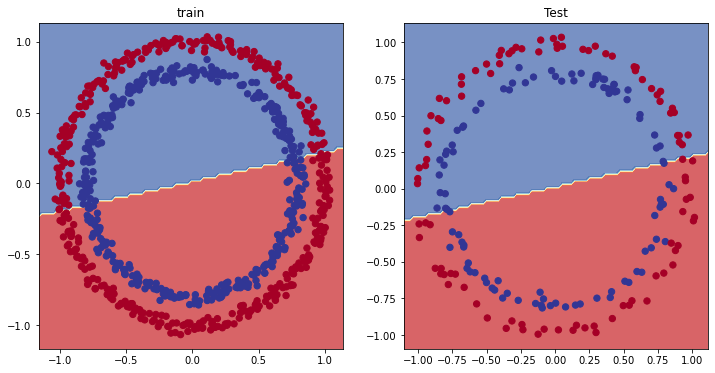

In [47]:
#plot decison boundary 

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

preparing data to see if our model can fit a straight line

In [48]:
weight =0.7
bais= 0.3
start=0
end=1
step=0.01

#creating data
X_regression= torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight *X_regression +bais
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
train_split= int(0.8 * len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split], y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:], y_regression[train_split:]


In [50]:
# len(X_train_regression) ,len(y_train_regression), len(X_test_regression), len(y_test_regression)

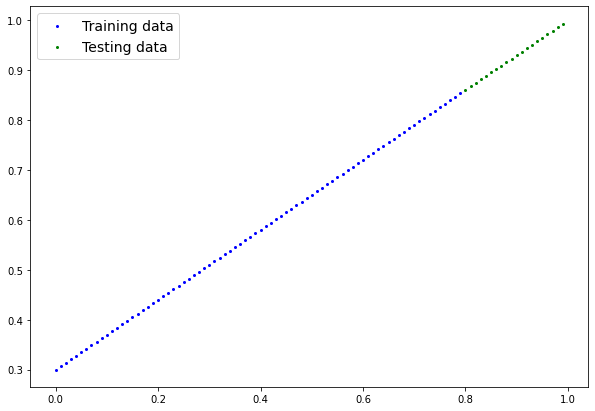

In [51]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

In [52]:
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [53]:
#adjust model_1 to fit a straight line

In [54]:
#same architecture as model_1
model_2=nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10), 
    nn.Linear(in_features=10, out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
#loss and optimizer
loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

Epoch: 0 | loss:  0.75986 | Test loss: 0.91103
Epoch: 100 | loss:  0.02858 | Test loss: 0.00081
Epoch: 200 | loss:  0.02533 | Test loss: 0.00209
Epoch: 300 | loss:  0.02137 | Test loss: 0.00305
Epoch: 400 | loss:  0.01964 | Test loss: 0.00341
Epoch: 500 | loss:  0.01940 | Test loss: 0.00387
Epoch: 600 | loss:  0.01903 | Test loss: 0.00379
Epoch: 700 | loss:  0.01878 | Test loss: 0.00381
Epoch: 800 | loss:  0.01840 | Test loss: 0.00329
Epoch: 900 | loss:  0.01798 | Test loss: 0.00360


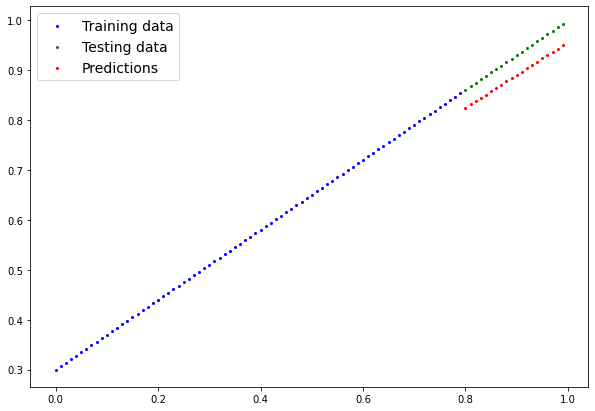

In [56]:
#training the model
torch.manual_seed(42)

epochs=1000

#training loop
for epoch in range(epochs):
    y_pred=model_2(X_train_regression)
    loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss= loss_fn(test_pred, y_test_regression)
    #print
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f} | Test loss: {test_loss:.5f}")
        
#         print(model_0.state_dict())

#turn on evaluation
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression,
                predictions=y_preds)



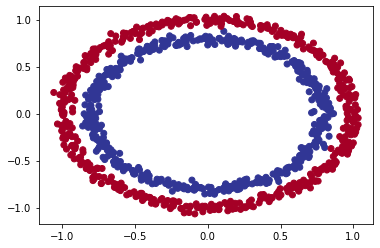

In [57]:
# non linearity

#recreating non-linear data

n_samples=1000
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [58]:
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [59]:
#builing a model with nonlinearity

In [60]:
from torch import nn
class CircleModeV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()
    
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    
model_3=CircleModeV2()
model_3

CircleModeV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [76]:
#setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),
                          lr=0.1)

In [77]:
#training with non linearity

In [78]:
torch.manual_seed(42)
#loop thru data
epochs=1000

for epoch in range(epochs):
    model_3.train()
    y_logits=model_3(X_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)
    acc= accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss= loss_fn(test_logits,y_test)
        test_acc= accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss: .5f}, Acc:{acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
    

Epoch: 0 | loss:  0.56818, Acc:87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 100 | loss:  0.48153, Acc:93.50% | Test loss: 0.49935, Test acc: 90.50%
Epoch: 200 | loss:  0.37056, Acc:97.75% | Test loss: 0.40595, Test acc: 92.00%
Epoch: 300 | loss:  0.25458, Acc:99.00% | Test loss: 0.30333, Test acc: 96.50%
Epoch: 400 | loss:  0.17180, Acc:99.50% | Test loss: 0.22108, Test acc: 97.50%
Epoch: 500 | loss:  0.12188, Acc:99.62% | Test loss: 0.16512, Test acc: 99.00%
Epoch: 600 | loss:  0.09123, Acc:99.88% | Test loss: 0.12741, Test acc: 99.50%
Epoch: 700 | loss:  0.07100, Acc:99.88% | Test loss: 0.10319, Test acc: 99.50%
Epoch: 800 | loss:  0.05773, Acc:99.88% | Test loss: 0.08672, Test acc: 99.50%
Epoch: 900 | loss:  0.04853, Acc:99.88% | Test loss: 0.07474, Test acc: 99.50%


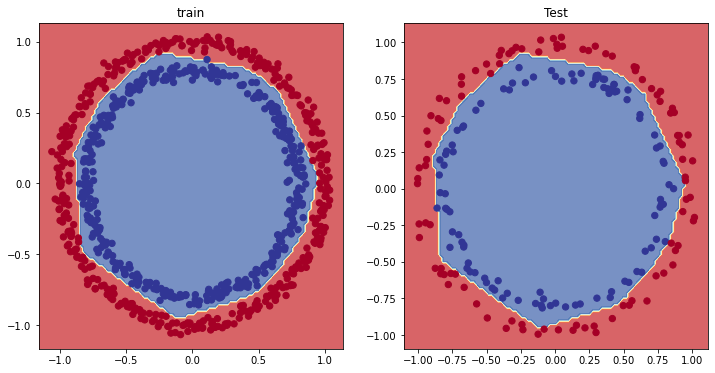

In [79]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [80]:
#replicating non linear activation functions

In [66]:
A= torch.arange(-10,10,1, dtype=torch.float32)

In [67]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

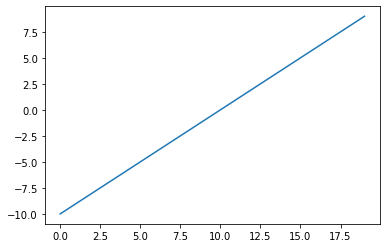

In [68]:
plt.plot(A)

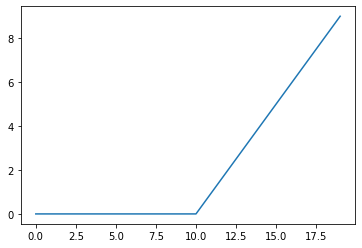

In [69]:
plt.plot(torch.relu(A))

In [70]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.max(torch.tensor(0),x)

In [71]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

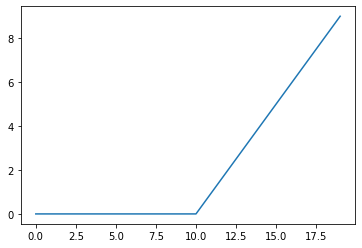

In [72]:
# Plot ReLU
plt.plot(relu(A))

In [73]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1/(1+ torch.exp(-x))

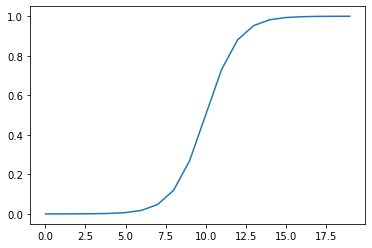

In [74]:
plt.plot(sigmoid(A))